In [1]:
import cv2
import face_recognition as fc

In [2]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    points=fc.face_locations(frame)
    for x,y,w,h in points:
        cv2.rectangle(frame,(y,x),(h,w),(0,255,0),5)
    cv2.imshow('detecting faces',frame)
    if cv2.waitKey(1) & 0xff==ord('c'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
import cv2
import pylab as plt
facecade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

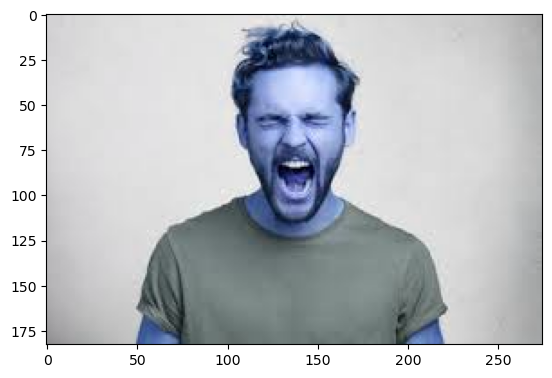

In [4]:
img=cv2.imread("angry.jpg")
plt.imshow(img)

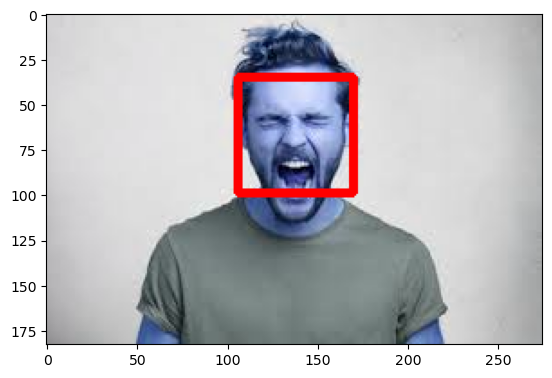

In [5]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=facecade.detectMultiScale(gray,1.3,4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(img)

In [6]:
import cv2
facecade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [7]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=facecade.detectMultiScale(gray,1.2,4)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('detecting faces',frame)
    if cv2.waitKey(1) & 0xff==ord('c'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np 
import face_recognition
import os

In [9]:
path=r'C:\Users\vijju\Desktop\Major Project\face recognition'
images=[]
classNames=[]
myList=os.listdir(path)
for cl in myList:
    curImg =cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])


In [ ]:
def findEncodings(images):
    encodeList=[]
    for img in images:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        encode=face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
encodeListKnown=findEncodings(images)

In [ ]:
np.save('encodeface.npy',encodeListKnown)

In [ ]:
encodeListKnown=np.load('encodeface.npy') 

In [1]:

cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    imgS=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    facesCurFrame=face_recognition.face_locations(imgS)
    encodesCurFrame=face_recognition.face_encodings(imgS,facesCurFrame)
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches=face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis=face_recognition.face_distance(encodeListKnown,encodeFace)
        matchIndex=np.argmin(faceDis)
        
        if matches[matchIndex]:
            name=classNames[matchIndex].upper()
            print(name)
            print(type(name))
            x,y,w,h=faceLoc
            cv2.rectangle(frame,(y,x),(h,w),(0,255,0),2)
            cv2.rectangle(frame,(y,w-35),(h,w),(0,255,0),cv2.FILLED)
            cv2.putText(frame,name,(h+6,w-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
    cv2.imshow('testing faces',frame)
    if cv2.waitKey(1) & 0xff==ord('c'):
        break
cap.release()
cv2.destroyAllWindows()
    

NameError: name 'cv2' is not defined